### Part 2 Diabetes


In [1]:
from scipy.io import arff
import pandas as pd
from GAN import GAN
from GAN_Twist import GAN_RF
from Dataset import Dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [2]:
scaler = StandardScaler()

data = arff.loadarff('Assignment 4 files/diabetes.arff')
df = pd.DataFrame(data[0])
to_norm = df.columns.values[:-1]
original_df = df.copy()
df['class'] = df['class'].apply(lambda x: x.decode("utf-8"))
df['class'] = df['class'].astype('category')
df['class'] = df['class'].cat.codes
class_col = df['class']
df = df.drop(columns=['class'], axis=1)
scaler = MinMaxScaler()
scaler.fit(df.values)
df = pd.DataFrame(scaler.transform(df.values), columns=df.columns)
df = pd.concat([df, class_col],axis=1)
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.30, random_state=42)
print(f'train shape: {X_train.shape}')
print(f'test shape: {X_test.shape}')

train shape: (537, 8)
test shape: (231, 8)


In [4]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train.values, y_train.values)

RandomForestClassifier(max_depth=3, random_state=0)

C:\Users\amits\Anaconda3\envs\home\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


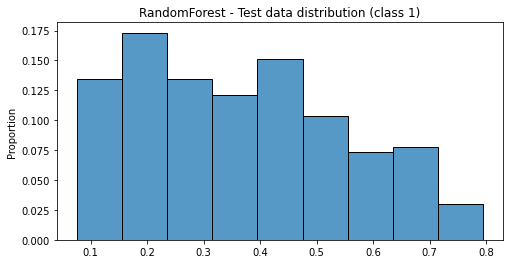

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 4))
confidence_score = clf.predict_proba(X_test)[:, 1]
sns.histplot(confidence_score, stat='proportion')
ax.set_title('RandomForest - Test data distribution (class 1)')
plt.show()

In [6]:
#Define the GAN and training parameters
noise_dim = 5
dim = 10
batch_size = 32

log_step = 100
epochs = 5000+1
learning_rate = 5e-4
models_dir = 'part2_model_diabetes'
C = 0.7

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim, C]
train_args = [models_dir, epochs, log_step]

model = GAN_RF

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args, clf)

In [7]:
history = synthesizer.train(df, train_args)

0 [D loss: 0.674427, acc.: 50.00%] [G loss: 1.004029]
100 [D loss: 0.675519, acc.: 51.56%] [G loss: 0.756326]
200 [D loss: 0.672844, acc.: 57.81%] [G loss: 0.721201]
300 [D loss: 0.705478, acc.: 48.44%] [G loss: 0.704806]
400 [D loss: 0.682447, acc.: 59.38%] [G loss: 0.735163]
500 [D loss: 0.682941, acc.: 57.81%] [G loss: 0.761899]
600 [D loss: 0.685903, acc.: 53.12%] [G loss: 0.696224]
700 [D loss: 0.681013, acc.: 57.81%] [G loss: 0.712627]
800 [D loss: 0.673955, acc.: 67.19%] [G loss: 0.709770]
900 [D loss: 0.673625, acc.: 57.81%] [G loss: 0.738519]
1000 [D loss: 0.670969, acc.: 62.50%] [G loss: 0.775395]
1100 [D loss: 0.683790, acc.: 57.81%] [G loss: 0.768612]
1200 [D loss: 0.669756, acc.: 60.94%] [G loss: 0.774129]
1300 [D loss: 0.657430, acc.: 62.50%] [G loss: 0.766783]
1400 [D loss: 0.643643, acc.: 62.50%] [G loss: 0.765761]
1500 [D loss: 0.654177, acc.: 62.50%] [G loss: 0.819188]
1600 [D loss: 0.658313, acc.: 62.50%] [G loss: 0.775474]
1700 [D loss: 0.650601, acc.: 64.06%] [G lo

In [8]:
from sklearn.decomposition import PCA

In [9]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded = scalar.transform(df.values)

In [10]:
import matplotlib.pyplot as plt
import numpy as np


# Setup parameters visualization parameters
seed = 17
test_size = 1000 # number of fraud cases

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real)

In [11]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

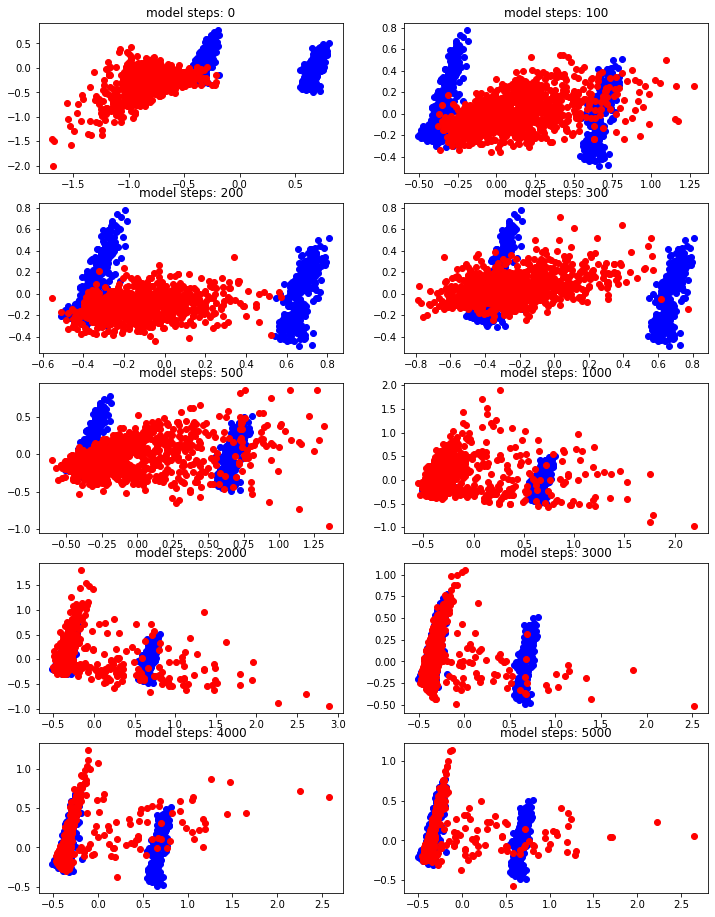

In [12]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 500, 1000, 2000, 3000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)



fig, ax = plt.subplots(5, 2, figsize=(12, 16))


for model_step_ix, model_step in enumerate(model_steps):      
    [model_name, with_class, generator_model] = models['GAN']
    generator_model.load_weights( base_dir +models_dir+ '_generator_model_weights_step_'+str(model_step)+'.h5')
    g_z = generator_model.predict([z, np.random.uniform(0, 1, test_size)])
    g_z_emb = scalar.transform(g_z)
    ax[model_step_ix // 2, model_step_ix % 2].scatter(X_embedded[:,0], X_embedded[:,1], c='b')
    ax[model_step_ix // 2, model_step_ix % 2].scatter(g_z_emb[:, 0], g_z_emb[:, 1], c='r')
    ax[model_step_ix // 2, model_step_ix % 2].set_title(f'model steps: {model_step}')

C:\Users\amits\Anaconda3\envs\home\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


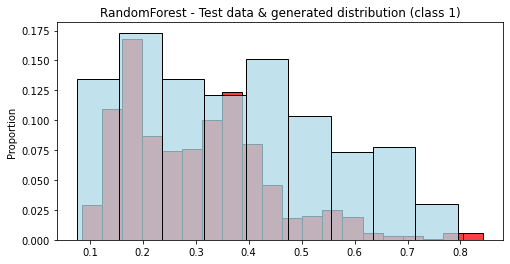

In [13]:
g_z__confidence_score_1 = clf.predict_proba(g_z[:, :-1])[:, 1]
confidence_score_1 = clf.predict_proba(X_test)[:, 1]


fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(g_z__confidence_score_1, stat='proportion', color='red')
sns.histplot(confidence_score_1, stat='proportion', color='lightblue')
ax.set_title('RandomForest - Test data & generated distribution (class 1)')
plt.show()

C:\Users\amits\Anaconda3\envs\home\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


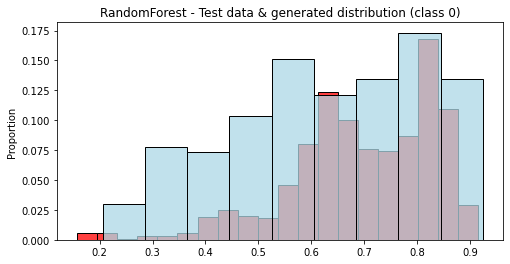

In [14]:
g_z__confidence_score_0 = clf.predict_proba(g_z[:, :-1])[:, 0]
confidence_score_0 = clf.predict_proba(X_test)[:, 0]

fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(g_z__confidence_score_0, stat='proportion', color='red')
sns.histplot(confidence_score_0, stat='proportion', color='lightblue')
ax.set_title('RandomForest - Test data & generated distribution (class 0)')
plt.show()